# BTC Analisis:

### Este archivo:

#### Busca pronosticar las variables del bitcoin en el tiempo. utiliza api https://www.coingecko.com/en/api/documentation, para obtener info de la criptomoneda seleccionada.


### El market_caps:

O "capitalización de mercado" es un término utilizado en el ámbito de las criptomonedas y se refiere al valor total de mercado de una criptomoneda específica en un momento dado. Representa la suma de todos los tokens o monedas de una criptomoneda en circulación multiplicado por el precio actual de cada token.

La capitalización de mercado es una medida importante que se utiliza para evaluar el tamaño y la popularidad de una criptomoneda en comparación con otras. Una capitalización de mercado más alta generalmente indica que una criptomoneda tiene una mayor adopción y valoración en el mercado.

Es importante tener en cuenta que la capitalización de mercado puede fluctuar ampliamente debido a los cambios en el precio de la criptomoneda y en la cantidad de tokens en circulación. También es importante considerar otros factores y métricas al evaluar una criptomoneda, como el volumen de operaciones, la liquidez, la tecnología subyacente y el equipo de desarrollo.

En el contexto del código que proporcionaste, "market_caps" se refiere a los datos de capitalización de mercado históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin.

### Total volumes:

O "volúmenes totales" se refiere al volumen total de transacciones realizadas con una criptomoneda específica en un momento dado. Representa la suma de todos los volúmenes de transacciones en la criptomoneda durante un período de tiempo determinado.

El volumen de transacciones es una métrica importante en el mercado de las criptomonedas, ya que proporciona información sobre la liquidez y la actividad de negociación de una criptomoneda. Un mayor volumen de transacciones generalmente indica una mayor actividad comercial y una mayor liquidez en el mercado, lo que puede ser un indicador de interés y confianza en la criptomoneda.

Es importante tener en cuenta que el volumen de transacciones puede variar ampliamente de un momento a otro y puede influir en la volatilidad de los precios de las criptomonedas. Un alto volumen de transacciones puede indicar una mayor actividad especulativa y comercial, mientras que un bajo volumen puede indicar menor interés o actividad en el mercado.

En el contexto del código que proporcionaste, "total_volumes" se refiere a los datos de volúmenes totales históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin, incluido el volumen total de transacciones.

________________________________________________________

# Api conection to data:

### Monthly data, here we have 1 record per day of the variables

In [48]:
import pandas as pd
import requests

bitcoin_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})

# Mostrar las últimas 50 filas del dataframe
print(df_bit.head(50))
print(df_bit.tail(50))

    timestamp    prices   market_caps  total_volumes
0  2013-04-28  135.3000  1.500518e+09            0.0
1  2013-04-29  141.9600  1.575032e+09            0.0
2  2013-04-30  135.3000  1.501657e+09            0.0
3  2013-05-01  117.0000  1.298952e+09            0.0
4  2013-05-02  103.4300  1.148668e+09            0.0
5  2013-05-03   91.0100  1.011066e+09            0.0
6  2013-05-04  111.2500  1.236352e+09            0.0
7  2013-05-05  116.7900  1.298378e+09            0.0
8  2013-05-06  118.3300  1.315992e+09            0.0
9  2013-05-07  106.4000  1.183766e+09            0.0
10 2013-05-08  112.6400  1.253655e+09            0.0
11 2013-05-09  113.0000  1.258131e+09            0.0
12 2013-05-10  118.7800  1.322989e+09            0.0
13 2013-05-11  113.0100  1.259239e+09            0.0
14 2013-05-12  114.7130  1.278709e+09            0.0
15 2013-05-13  117.1800  1.306721e+09            0.0
16 2013-05-14  114.5000  1.277279e+09            0.0
17 2013-05-15  114.1560  1.273850e+09         

In [49]:
import pandas as pd

# Ordenamos los datos, por posibles desordenes internos
df_bit = df_bit.sort_values('timestamp', ascending=True)
df_bit.head()
# Ahora df_sorted contendrá el DataFrame ordenado por la columna "timestamp" en orden ascendente


,timestamp,prices,market_caps,total_volumes
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


In [50]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730 entries, 0 to 3729
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      3730 non-null   datetime64[ns]
 1   prices         3730 non-null   float64       
 2   market_caps    3729 non-null   float64       
 3   total_volumes  3730 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 116.7 KB


In [51]:
df_bit.isnull().sum()

timestamp        0
prices           0
market_caps      1
total_volumes    0
dtype: int64

In [52]:
df_bit = df_bit.dropna()

In [53]:
df_bit.drop_duplicates()

,timestamp,prices,market_caps,total_volumes
0,2013-04-28 00:00:00,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
3725,2023-07-12 00:00:00,30620.814247,5.947492e+11,1.175342e+10
3726,2023-07-13 00:00:00,30407.416314,5.906294e+11,1.307256e+10
3727,2023-07-14 00:00:00,31446.014971,6.107255e+11,2.125427e+10
3728,2023-07-15 00:00:00,30311.827808,5.881074e+11,2.197715e+10


In [54]:
df_bit.describe()

,timestamp,prices,market_caps,total_volumes
count,3729,3729.000000,3.729000e+03,3.729000e+03
mean,2018-06-07 10:26:09.547422208,11870.508933,2.204489e+11,1.414002e+10
min,2013-04-28 00:00:00,67.809000,7.713681e+08,0.000000e+00
25%,2015-11-18 00:00:00,567.250000,7.303696e+09,1.304905e+08
50%,2018-06-08 00:00:00,6314.883384,1.090234e+11,3.534743e+09
75%,2020-12-26 00:00:00,17084.873340,3.246084e+11,2.432579e+10
max,2023-07-15 12:27:18,67617.015545,1.278798e+12,1.788941e+11
std,NaN,15581.928874,2.952651e+11,1.844863e+10


In [55]:
import seaborn as sns

In [56]:
# sns.pairplot(df_bit)

____________________________________________________________________________________________________________________________________________________

# Transpuesta

In [57]:
df_bit_t = df_bit.T

In [58]:
# Almacenar los índices en una variable
indices = df_bit_t.index

In [59]:
# Almacenar los nombres de las filas en una variable
df_bit_t_row_names = df_bit_t.index

# Eliminar los nombres de las filas del índice del DataFrame
df_bit_t.reset_index(drop=True, inplace=True)

# Imprimir los nombres de las filas
print(df_bit_t_row_names)

Index(['timestamp', 'prices', 'market_caps', 'total_volumes'], dtype='object')


In [60]:
df_bit_t

,0,1,2,3,4,5,6,7,8,9,...,3720,3721,3722,3723,3724,3725,3726,3727,3728,3729
0,2013-04-28 00:00:00,2013-04-29 00:00:00,2013-04-30 00:00:00,2013-05-01 00:00:00,2013-05-02 00:00:00,2013-05-03 00:00:00,2013-05-04 00:00:00,2013-05-05 00:00:00,2013-05-06 00:00:00,2013-05-07 00:00:00,...,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-14 00:00:00,2023-07-15 00:00:00,2023-07-15 12:27:18
1,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31446.014971,30311.827808,30340.003016
2,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,610725509598.846436,588107447250.13269,589438536695.290039
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,21254274345.702217,21977151420.853252,12765100098.887804


In [61]:
# Almacenar la primera fila en una variable
primera_fila = df_bit_t.iloc[0]

# Eliminar la primera fila del DataFrame
df_bit_t = df_bit_t.iloc[1:]

print(primera_fila)

0       2013-04-28 00:00:00
1       2013-04-29 00:00:00
2       2013-04-30 00:00:00
3       2013-05-01 00:00:00
4       2013-05-02 00:00:00
               ...         
3725    2023-07-12 00:00:00
3726    2023-07-13 00:00:00
3727    2023-07-14 00:00:00
3728    2023-07-15 00:00:00
3729    2023-07-15 12:27:18
Name: 0, Length: 3729, dtype: object


In [62]:
df_bit_t

,0,1,2,3,4,5,6,7,8,9,...,3720,3721,3722,3723,3724,3725,3726,3727,3728,3729
1,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31446.014971,30311.827808,30340.003016
2,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,610725509598.846436,588107447250.13269,589438536695.290039
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,21254274345.702217,21977151420.853252,12765100098.887804


_____________________________________________

# 2. Regresión lineal múltiple


In [63]:
# import numpy as np

In [64]:
# X = df_bit[['timestamp','market_caps','total_volumes']]
# y = df_bit['prices']

In [65]:
# X


In [66]:
# y

In [67]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [69]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# # Assuming X and y are defined correctly as pandas DataFrames or numpy arrays

# # Exclude the 'Timestamp' column from X_train
# X_train = X_train.drop('timestamp', axis=1)  # Assuming X_train is a DataFrame
# # X_train = X_train[:, 1:]  # Assuming X_train is a numpy array

# # Convert X_train and y_train to numpy arrays and ensure they have a numeric data type
# X_train = np.array(X_train, dtype=np.float64)
# y_train = np.array(y_train, dtype=np.float64)

# # Check the shapes and data types of X_train and y_train
# print(X_train.shape, X_train.dtype)
# print(y_train.shape, y_train.dtype)

# # Instantiate the linear regression model and train it
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)

# # Get the coefficients and intercept
# print('The coefficients of the linear regression model are:', linear_model.coef_)
# print('The intercept of the linear regression model is:', linear_model.intercept_)


In [70]:
# X_train

In [71]:
# #Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

# print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
# print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

_____________________________________________

# Recycled model

In [72]:
# Opcion 2: - CONECTADA - OK
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Filtrar los últimos 45 días
last_45_days = df_bit[-55:].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# Dividir los datos en características (X) y variable objetivo (y)
X = last_45_days[['days']]
y_prices = last_45_days['prices']
y_market_caps = last_45_days['market_caps']
y_total_volumes = last_45_days['total_volumes']

# Crear un modelo de regresión lineal para cada variable
model_prices = LinearRegression()
model_market_caps = LinearRegression()
model_total_volumes = LinearRegression()

# Ajustar los modelos a los datos de los últimos 45 días
model_prices.fit(X, y_prices)
model_market_caps.fit(X, y_market_caps)
model_total_volumes.fit(X, y_total_volumes)

# Generar valores futuros de días para los próximos 30 días
future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

# Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
future_prices = model_prices.predict(future_days)
future_market_caps = model_market_caps.predict(future_days)
future_total_volumes = model_total_volumes.predict(future_days)

# Calcular desviaciones estándar para cada variable
std_prices = 2229.815617/5
std_market_caps = 4.379837e+10/5
std_total_volumes = 3.940256e+09

# Generar ruido gaussiano para cada variable
noise_prices = np.random.normal(0, std_prices, len(future_prices))
noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# Agregar ruido a los valores pronosticados
future_prices += noise_prices
future_market_caps += noise_market_caps
future_total_volumes += noise_total_volumes

# Crear un DataFrame con los valores proyectados y con ruido
projected_data_with_noise = pd.DataFrame({
    'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(1), periods=30, freq='D'),
    'prices': future_prices,
    'market_caps': future_market_caps,
    'total_volumes': future_total_volumes
})

# Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
projected_df = pd.concat([last_45_days, projected_data_with_noise])

# Restablecer los índices
projected_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
print(projected_df)


             timestamp        prices   market_caps  total_volumes  days
0  2023-05-23 00:00:00  26869.686022  5.208219e+11   8.025717e+09   0.0
1  2023-05-24 00:00:00  27222.937747  5.275287e+11   1.168576e+10   1.0
2  2023-05-25 00:00:00  26338.948947  5.109880e+11   1.747720e+10   2.0
3  2023-05-26 00:00:00  26475.607903  5.132957e+11   1.195375e+10   3.0
4  2023-05-27 00:00:00  26717.987554  5.179737e+11   1.099404e+10   4.0
..                 ...           ...           ...            ...   ...
80 2023-08-10 12:27:18  33638.264135  6.464563e+11   1.694000e+10   NaN
81 2023-08-11 12:27:18  33404.817526  6.562314e+11   1.466040e+10   NaN
82 2023-08-12 12:27:18  33176.052952  6.656468e+11   1.581669e+10   NaN
83 2023-08-13 12:27:18  33477.041837  6.407205e+11   2.057573e+10   NaN
84 2023-08-14 12:27:18  33755.194533  6.554410e+11   1.722897e+10   NaN

[85 rows x 5 columns]


In [73]:
min_timestamp = projected_df['timestamp'].min()
projected_df['days'] = (projected_df['timestamp'] - min_timestamp).dt.days

In [74]:
import missingno as msno

<Axes: >

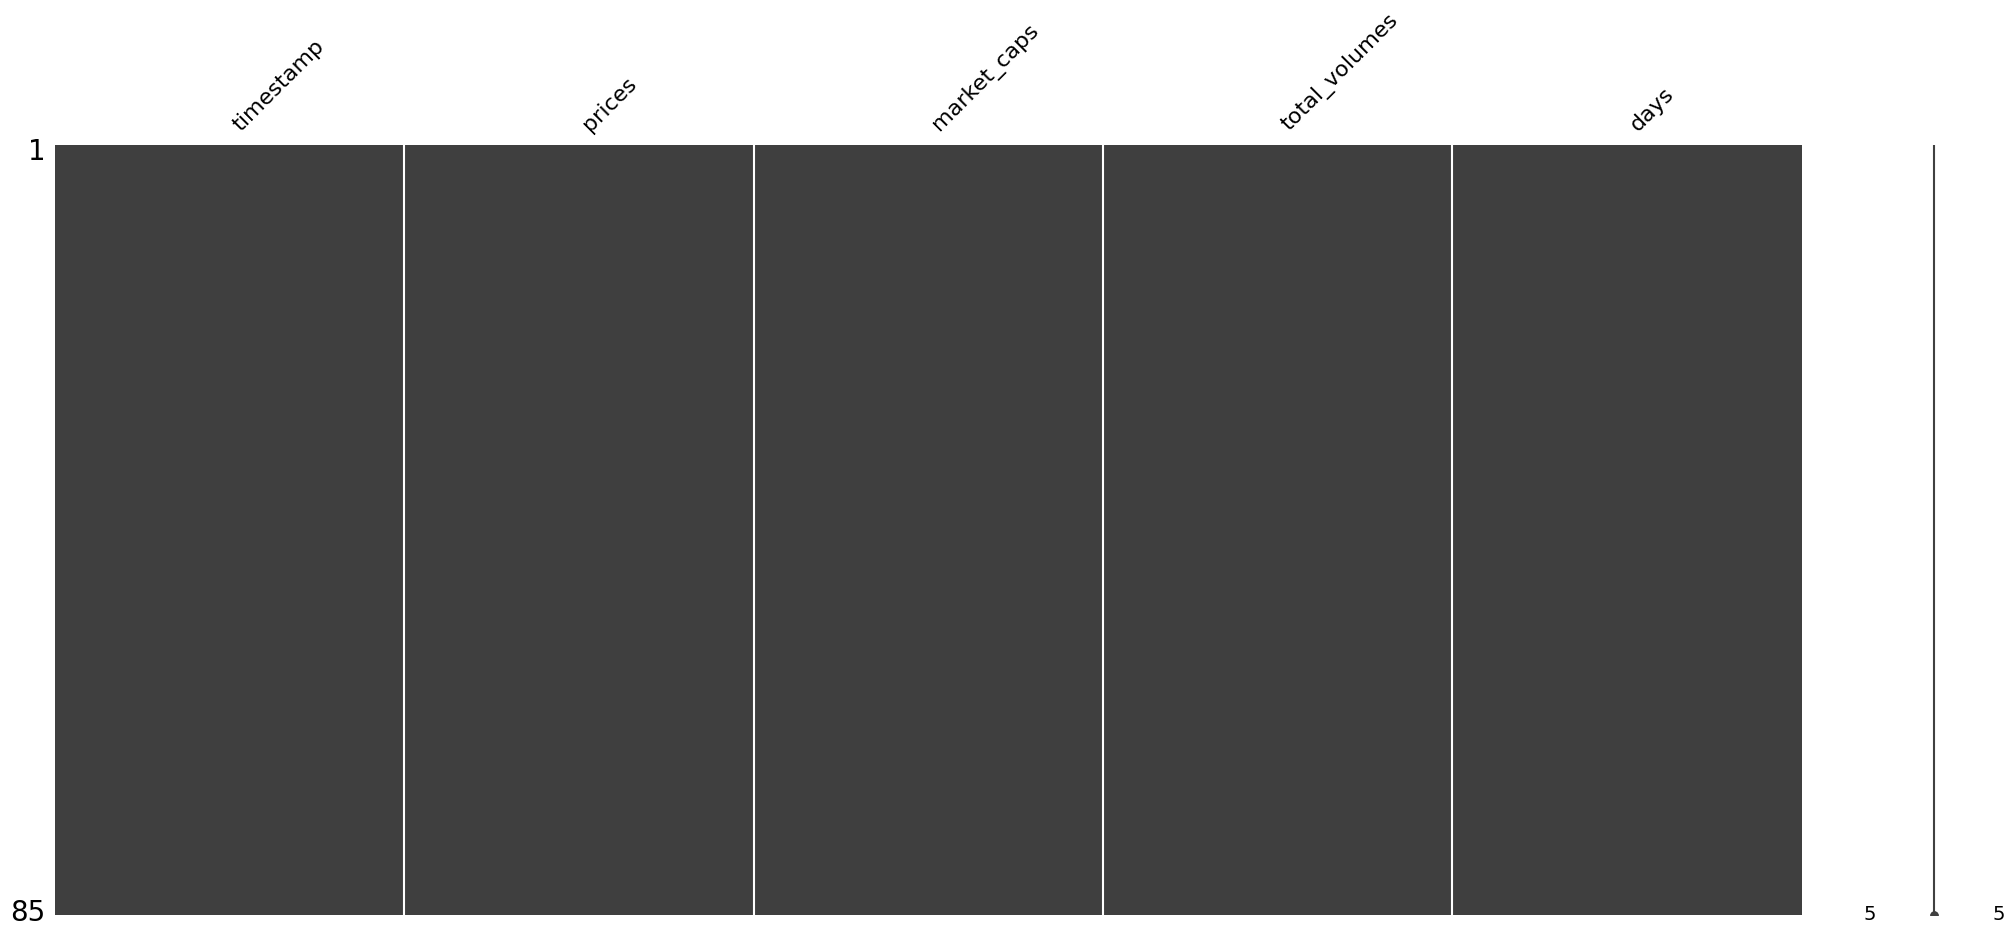

In [75]:
msno.matrix(projected_df)

# ok, wai, if we add some dimensions..?

In [76]:
# Paso 1: Seleccionar solo las columnas numéricas
numeric_columns = projected_df.select_dtypes(include='number')

# Paso 2 y 3: Calcular la diferencia y agregar las columnas adicionales
for column in numeric_columns:
    diff_column_name = column + '_diff'  # Nombre de la columna adicional
    projected_df[diff_column_name] = projected_df[column].diff()
    diff_column_name = column + '_incremento'  # Nombre de la columna adicional
    projected_df[diff_column_name] = projected_df[column].pct_change() * 100

In [77]:
projected_df

,timestamp,prices,market_caps,total_volumes,days,prices_diff,prices_incremento,market_caps_diff,market_caps_incremento,total_volumes_diff,total_volumes_incremento,days_diff,days_incremento
0,2023-05-23 00:00:00,26869.686022,5.208219e+11,8.025717e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-24 00:00:00,27222.937747,5.275287e+11,1.168576e+10,1,353.251725,1.314685,6.706780e+09,1.287730,3.660047e+09,45.603987,1.0,inf
2,2023-05-25 00:00:00,26338.948947,5.109880e+11,1.747720e+10,2,-883.988800,-3.247220,-1.654072e+10,-3.135510,5.791436e+09,49.559758,1.0,100.000000
3,2023-05-26 00:00:00,26475.607903,5.132957e+11,1.195375e+10,3,136.658956,0.518847,2.307744e+09,0.451624,-5.523451e+09,-31.603752,1.0,50.000000
4,2023-05-27 00:00:00,26717.987554,5.179737e+11,1.099404e+10,4,242.379651,0.915483,4.678007e+09,0.911367,-9.597122e+08,-8.028545,1.0,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2023-08-10 12:27:18,33638.264135,6.464563e+11,1.694000e+10,79,562.035262,1.699212,9.326876e+09,1.463890,3.901253e+09,29.920458,1.0,1.282051
81,2023-08-11 12:27:18,33404.817526,6.562314e+11,1.466040e+10,80,-233.446609,-0.693991,9.775080e+09,1.512102,-2.279598e+09,-13.456895,1.0,1.265823
82,2023-08-12 12:27:18,33176.052952,6.656468e+11,1.581669e+10,81,-228.764574,-0.684825,9.415377e+09,1.434765,1.156285e+09,7.887132,1.0,1.250000
83,2023-08-13 12:27:18,33477.041837,6.407205e+11,2.057573e+10,82,300.988885,0.907247,-2.492633e+10,-3.744678,4.759041e+09,30.088731,1.0,1.234568


In [78]:
projected_df.fillna(0)

,timestamp,prices,market_caps,total_volumes,days,prices_diff,prices_incremento,market_caps_diff,market_caps_incremento,total_volumes_diff,total_volumes_incremento,days_diff,days_incremento
0,2023-05-23 00:00:00,26869.686022,5.208219e+11,8.025717e+09,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000
1,2023-05-24 00:00:00,27222.937747,5.275287e+11,1.168576e+10,1,353.251725,1.314685,6.706780e+09,1.287730,3.660047e+09,45.603987,1.0,inf
2,2023-05-25 00:00:00,26338.948947,5.109880e+11,1.747720e+10,2,-883.988800,-3.247220,-1.654072e+10,-3.135510,5.791436e+09,49.559758,1.0,100.000000
3,2023-05-26 00:00:00,26475.607903,5.132957e+11,1.195375e+10,3,136.658956,0.518847,2.307744e+09,0.451624,-5.523451e+09,-31.603752,1.0,50.000000
4,2023-05-27 00:00:00,26717.987554,5.179737e+11,1.099404e+10,4,242.379651,0.915483,4.678007e+09,0.911367,-9.597122e+08,-8.028545,1.0,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2023-08-10 12:27:18,33638.264135,6.464563e+11,1.694000e+10,79,562.035262,1.699212,9.326876e+09,1.463890,3.901253e+09,29.920458,1.0,1.282051
81,2023-08-11 12:27:18,33404.817526,6.562314e+11,1.466040e+10,80,-233.446609,-0.693991,9.775080e+09,1.512102,-2.279598e+09,-13.456895,1.0,1.265823
82,2023-08-12 12:27:18,33176.052952,6.656468e+11,1.581669e+10,81,-228.764574,-0.684825,9.415377e+09,1.434765,1.156285e+09,7.887132,1.0,1.250000
83,2023-08-13 12:27:18,33477.041837,6.407205e+11,2.057573e+10,82,300.988885,0.907247,-2.492633e+10,-3.744678,4.759041e+09,30.088731,1.0,1.234568


In [79]:
projected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 85 non-null     datetime64[ns]
 1   prices                    85 non-null     float64       
 2   market_caps               85 non-null     float64       
 3   total_volumes             85 non-null     float64       
 4   days                      85 non-null     int64         
 5   prices_diff               84 non-null     float64       
 6   prices_incremento         84 non-null     float64       
 7   market_caps_diff          84 non-null     float64       
 8   market_caps_incremento    84 non-null     float64       
 9   total_volumes_diff        84 non-null     float64       
 10  total_volumes_incremento  84 non-null     float64       
 11  days_diff                 84 non-null     float64       
 12  days_incremento         

In [80]:
# sns.pairplot(projected_df)

#### Las nuevas dimensiones creadas son viables y aportan informacion al ML ya que se pueden observar nuevas distribuciones normales agregadas y nuevas tendencias

In [81]:
projected_df.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
days                        0
prices_diff                 1
prices_incremento           1
market_caps_diff            1
market_caps_incremento      1
total_volumes_diff          1
total_volumes_incremento    1
days_diff                   1
days_incremento             1
dtype: int64

In [82]:
projected_df = projected_df.fillna(0)

In [83]:
import missingno as msno

<Axes: >

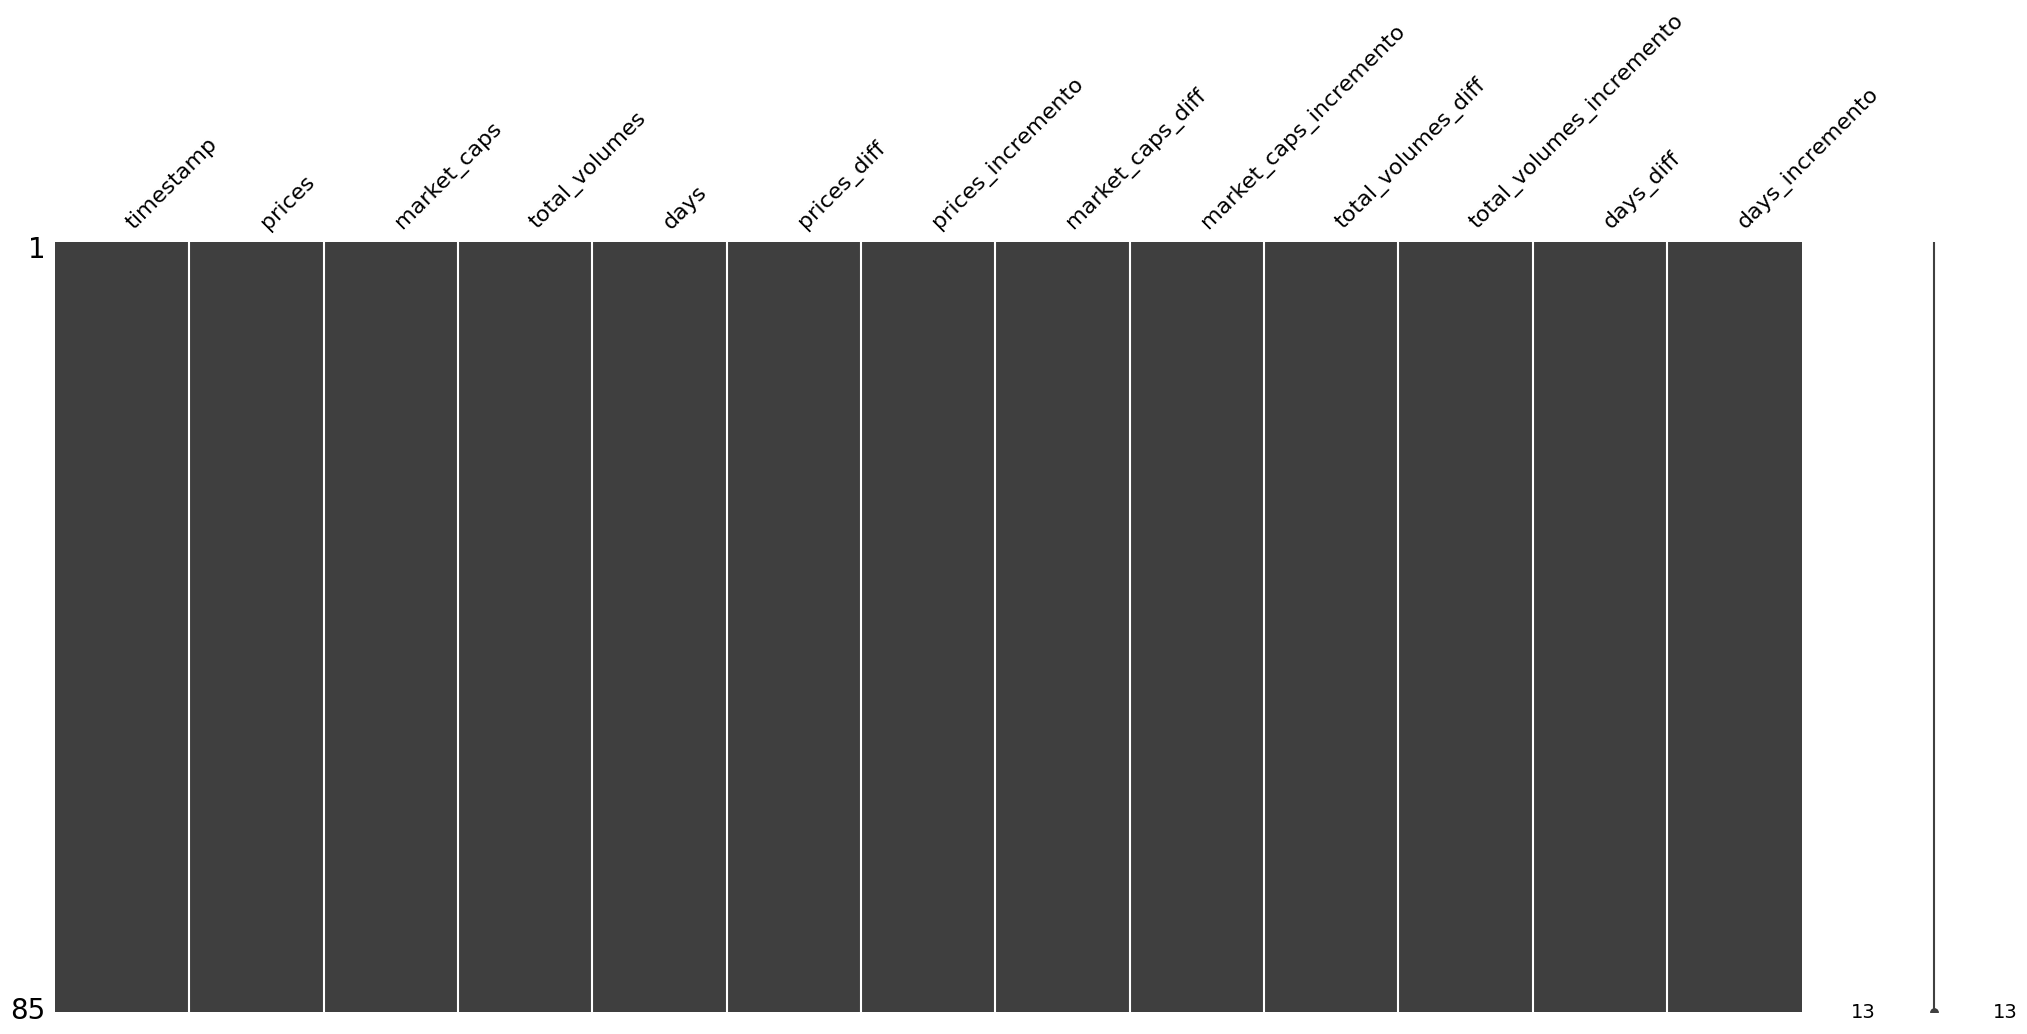

In [84]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(projected_df)

In [85]:
projected_df = projected_df.drop_duplicates()

In [86]:
projected_df.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
days                        0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
days_diff                   0
days_incremento             0
dtype: int64

In [87]:
projected_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 85 non-null     datetime64[ns]
 1   prices                    85 non-null     float64       
 2   market_caps               85 non-null     float64       
 3   total_volumes             85 non-null     float64       
 4   days                      85 non-null     int64         
 5   prices_diff               85 non-null     float64       
 6   prices_incremento         85 non-null     float64       
 7   market_caps_diff          85 non-null     float64       
 8   market_caps_incremento    85 non-null     float64       
 9   total_volumes_diff        85 non-null     float64       
 10  total_volumes_incremento  85 non-null     float64       
 11  days_diff                 85 non-null     float64       
 12  days_incremento         

#### Los datos eliminados corresponden a datos muy vejos, como el msno muestra. no hay problema con dropearlos..

<Axes: >

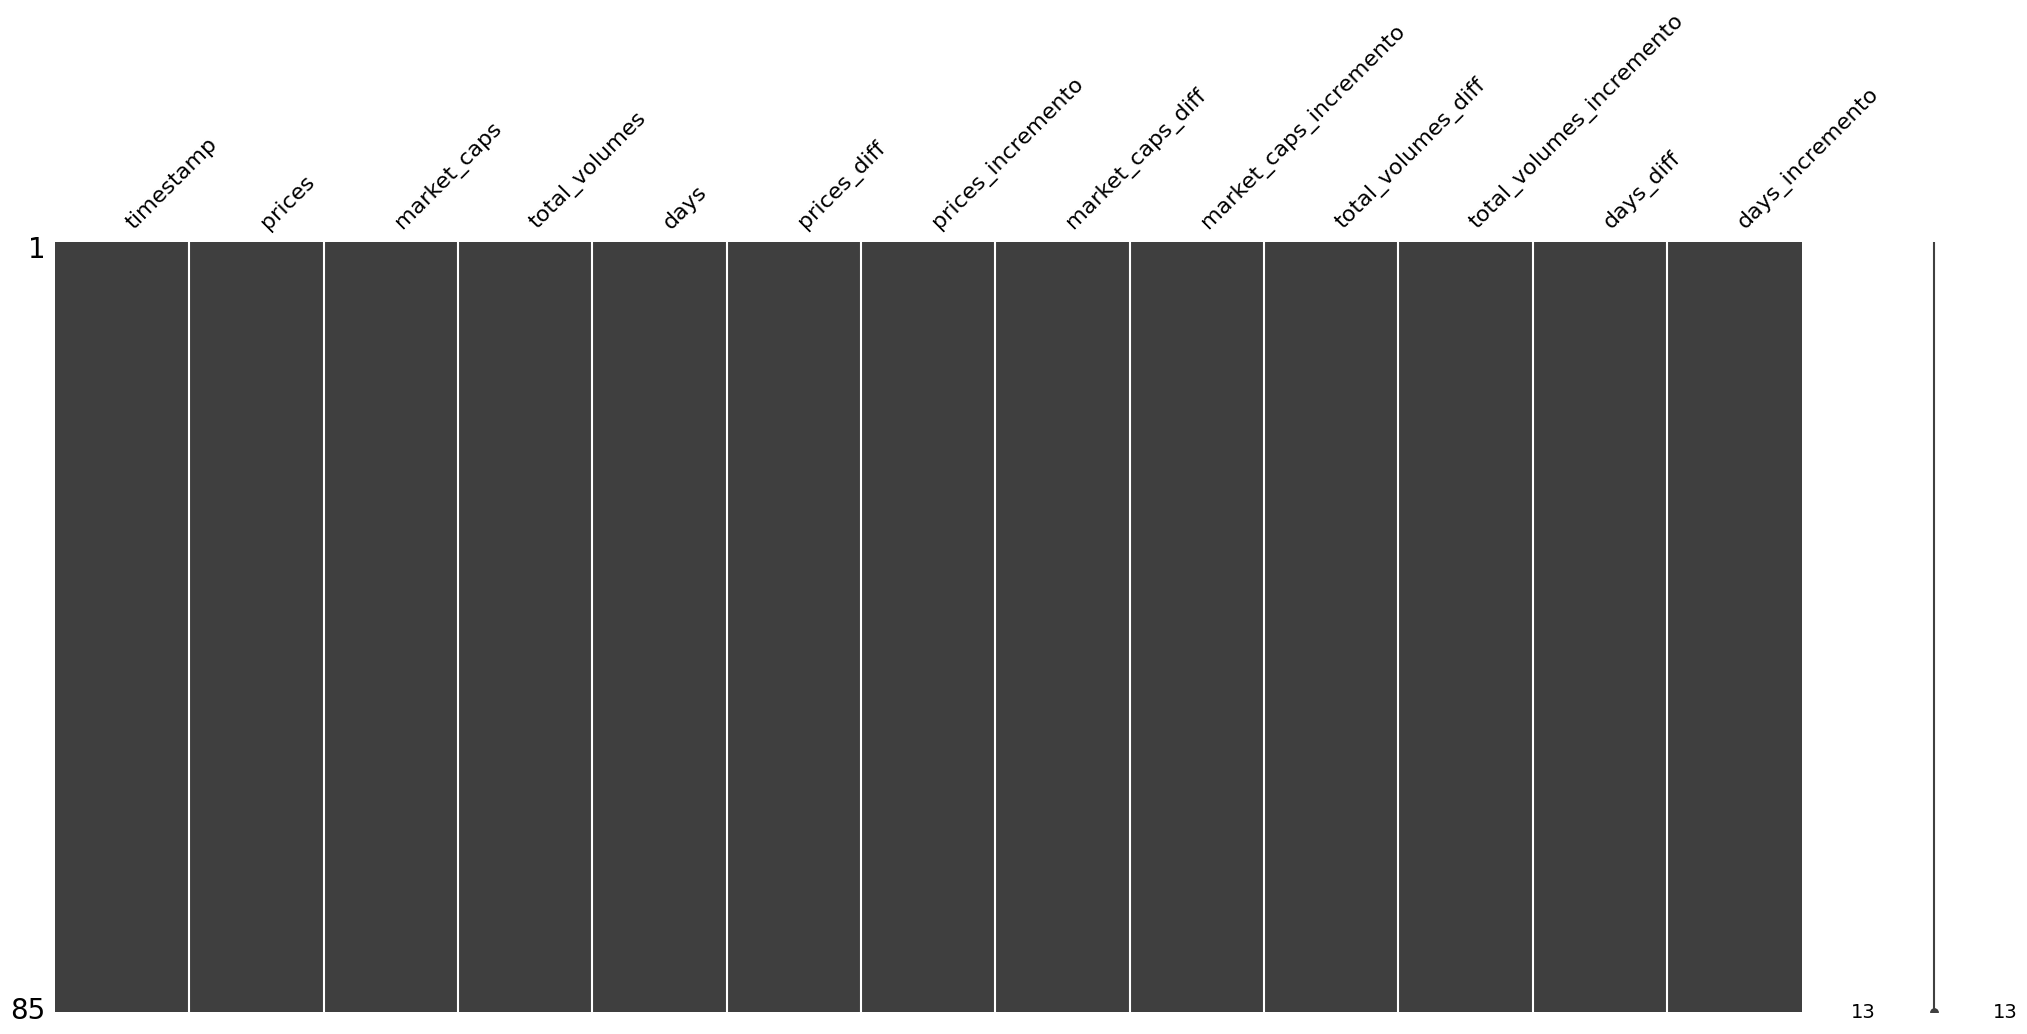

In [88]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(projected_df)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


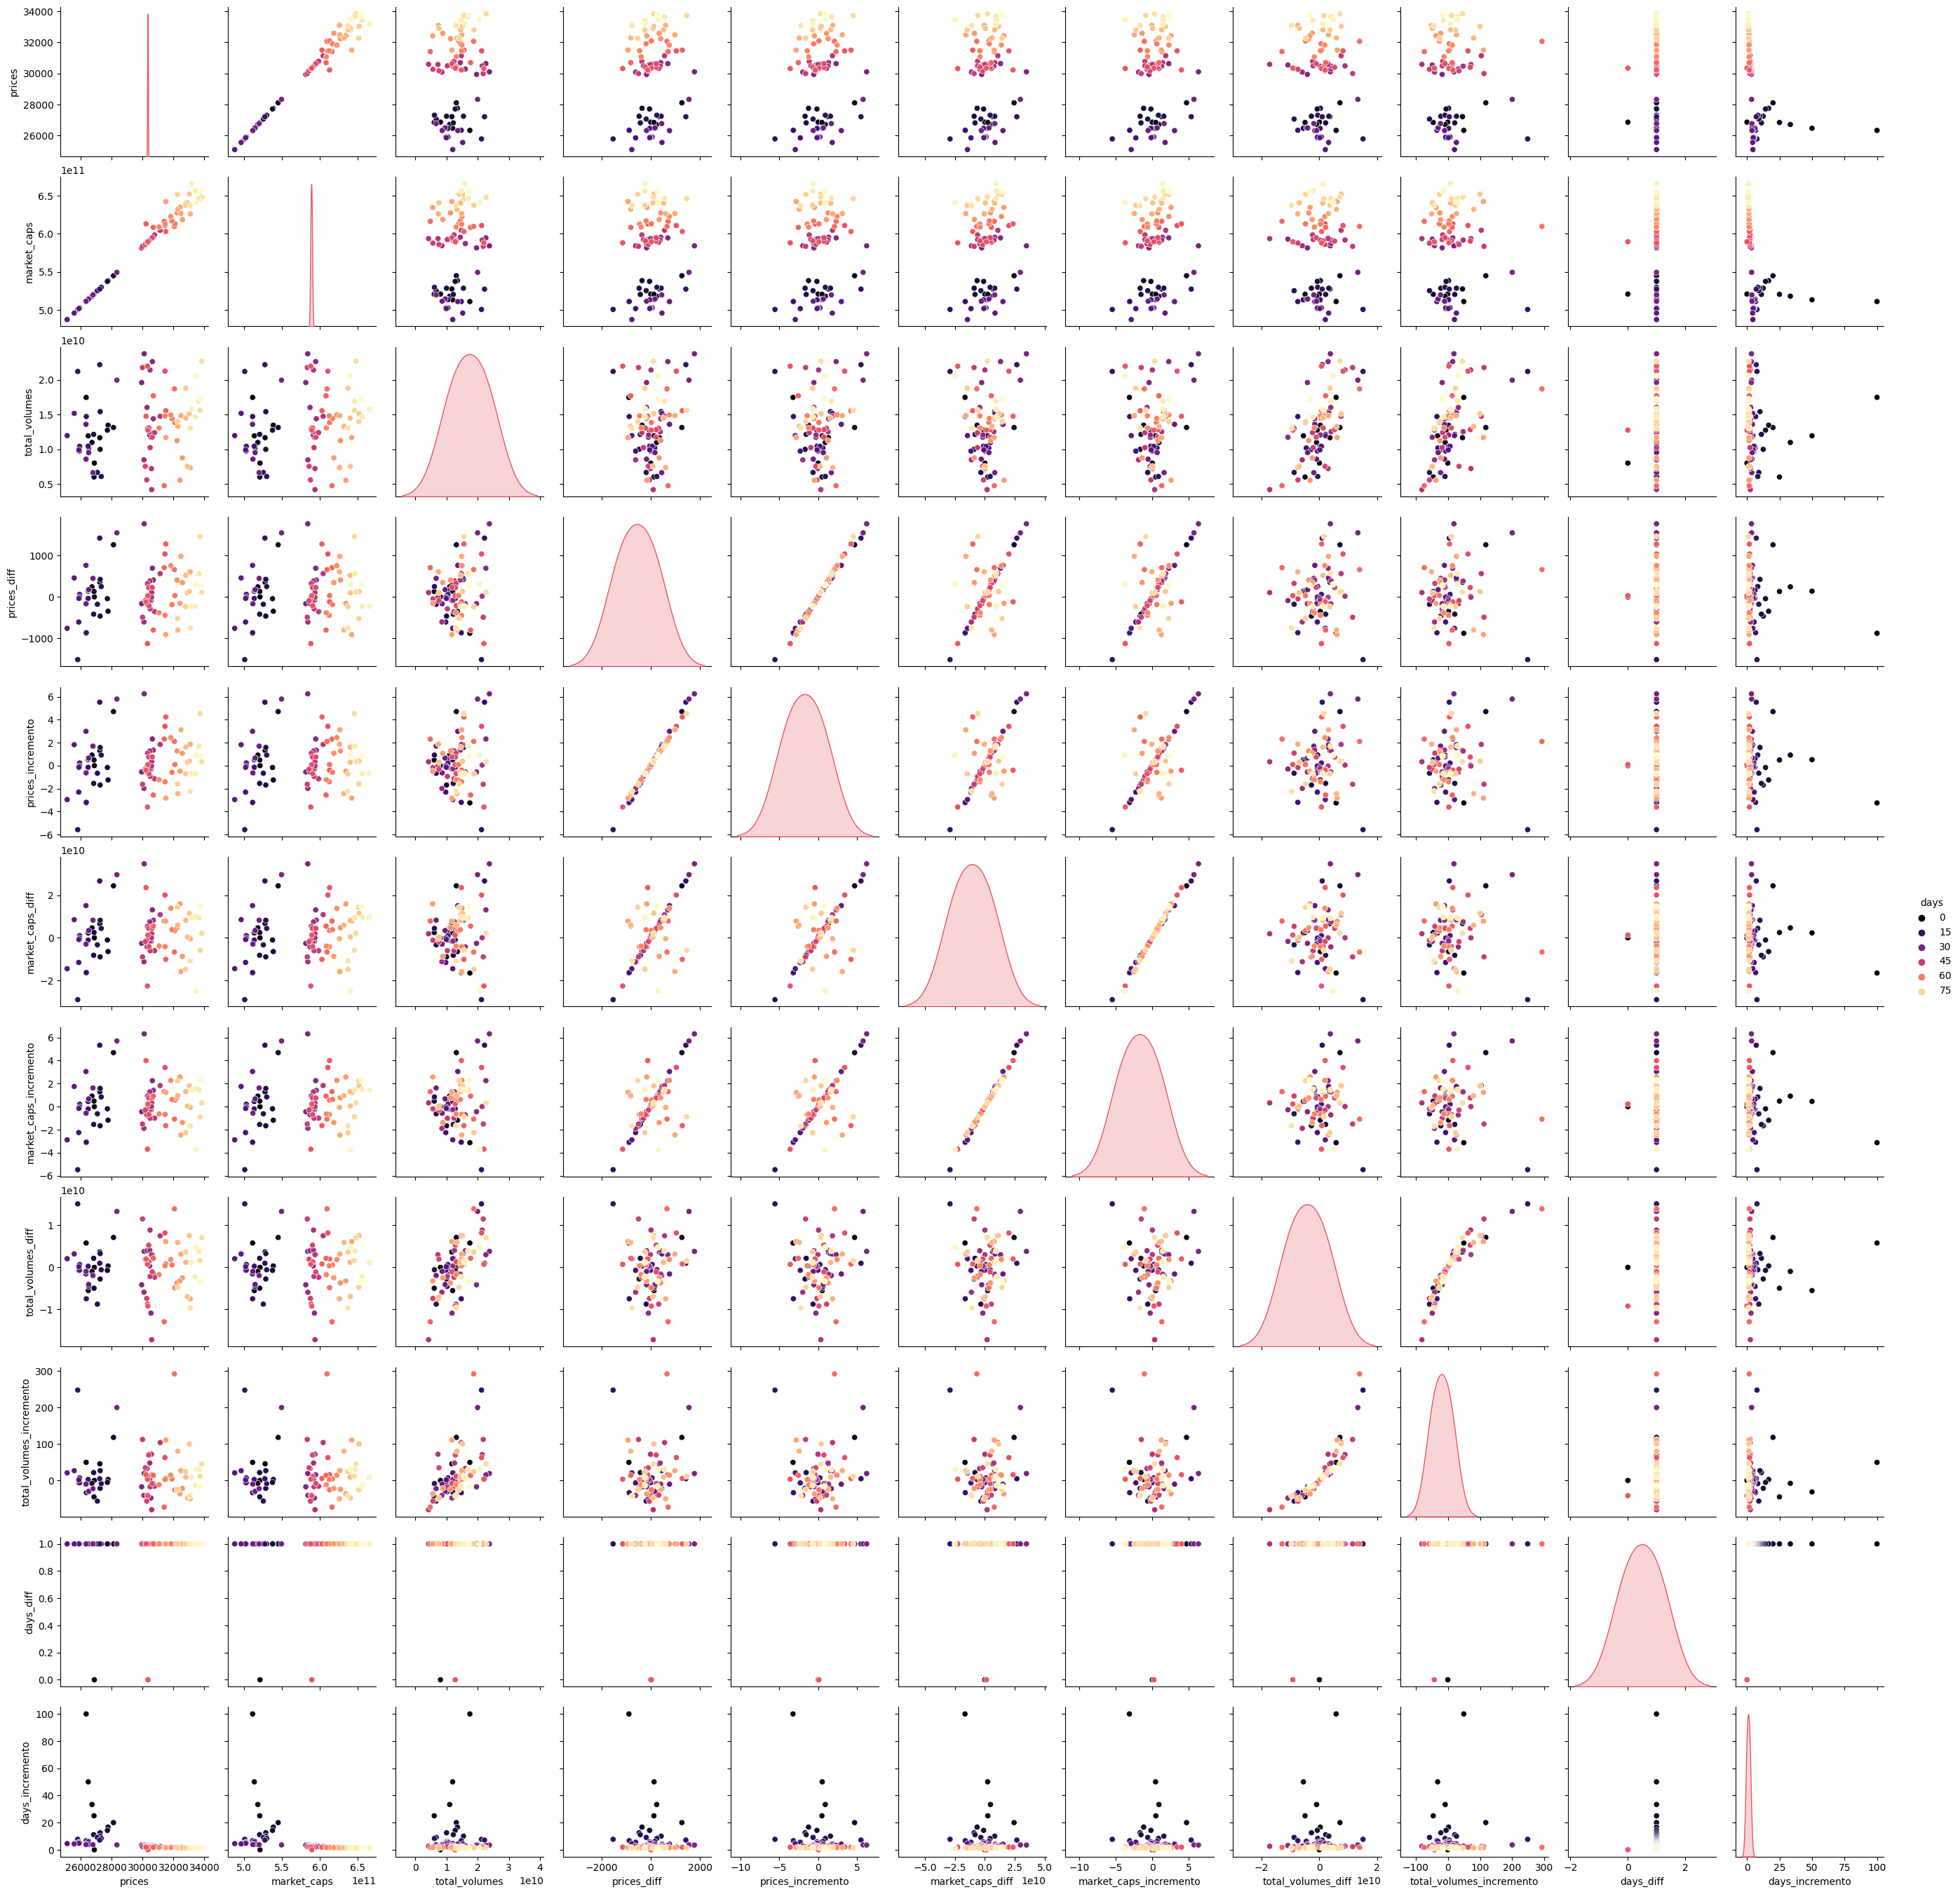

In [90]:
sns.pairplot(projected_df, hue= 'days', palette='magma')

In [91]:
projected_df.describe()

,timestamp,prices,market_caps,total_volumes,days,prices_diff,prices_incremento,market_caps_diff,market_caps_incremento,total_volumes_diff,total_volumes_incremento,days_diff,days_incremento
count,85,85.000000,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,8.500000e+01,85.000000,8.500000e+01,85.000000,85.000000,85.000000
mean,2023-07-03 19:47:22.094118144,29819.966421,5.795675e+11,1.335708e+10,41.635294,81.005982,0.290626,1.583754e+09,0.291206,1.082736e+08,13.677309,0.976471,inf
min,2023-05-23 00:00:00,25107.754696,4.872628e+11,4.210431e+09,0.000000,-1522.831497,-5.574983,-2.903620e+10,-5.482354,-1.721193e+10,-80.345625,0.000000,0.000000
25%,2023-06-13 00:00:00,27216.615565,5.272956e+11,1.019792e+10,21.000000,-233.446609,-0.696905,-4.253360e+09,-0.719217,-3.221683e+09,-22.092301,1.000000,1.587302
50%,2023-07-04 00:00:00,30407.416314,5.913877e+11,1.307256e+10,42.000000,28.175208,0.092749,1.331089e+09,0.226334,3.406993e+08,2.625618,1.000000,2.380952
75%,2023-07-24 12:27:18,31903.254596,6.167944e+11,1.556384e+10,62.000000,406.108012,1.314685,8.213677e+09,1.299593,3.272058e+09,26.946482,1.000000,4.761905
max,2023-08-14 12:27:18,33834.497241,6.656468e+11,2.375725e+10,83.000000,1770.873400,6.250680,3.474040e+10,6.324139,1.511039e+10,292.282990,1.000000,inf
std,NaN,2564.798078,5.067179e+10,4.685726e+09,24.279056,611.848752,2.112172,1.146979e+10,2.036640,5.795922e+09,61.667149,0.152477,NaN


In [92]:
projected_df.tail()


,timestamp,prices,market_caps,total_volumes,days,prices_diff,prices_incremento,market_caps_diff,market_caps_incremento,total_volumes_diff,total_volumes_incremento,days_diff,days_incremento
80,2023-08-10 12:27:18,33638.264135,6.464563e+11,1.694000e+10,79,562.035262,1.699212,9.326876e+09,1.463890,3.901253e+09,29.920458,1.0,1.282051
81,2023-08-11 12:27:18,33404.817526,6.562314e+11,1.466040e+10,80,-233.446609,-0.693991,9.775080e+09,1.512102,-2.279598e+09,-13.456895,1.0,1.265823
82,2023-08-12 12:27:18,33176.052952,6.656468e+11,1.581669e+10,81,-228.764574,-0.684825,9.415377e+09,1.434765,1.156285e+09,7.887132,1.0,1.250000
83,2023-08-13 12:27:18,33477.041837,6.407205e+11,2.057573e+10,82,300.988885,0.907247,-2.492633e+10,-3.744678,4.759041e+09,30.088731,1.0,1.234568
84,2023-08-14 12:27:18,33755.194533,6.554410e+11,1.722897e+10,83,278.152696,0.830876,1.472053e+10,2.297497,-3.346757e+09,-16.265557,1.0,1.219512


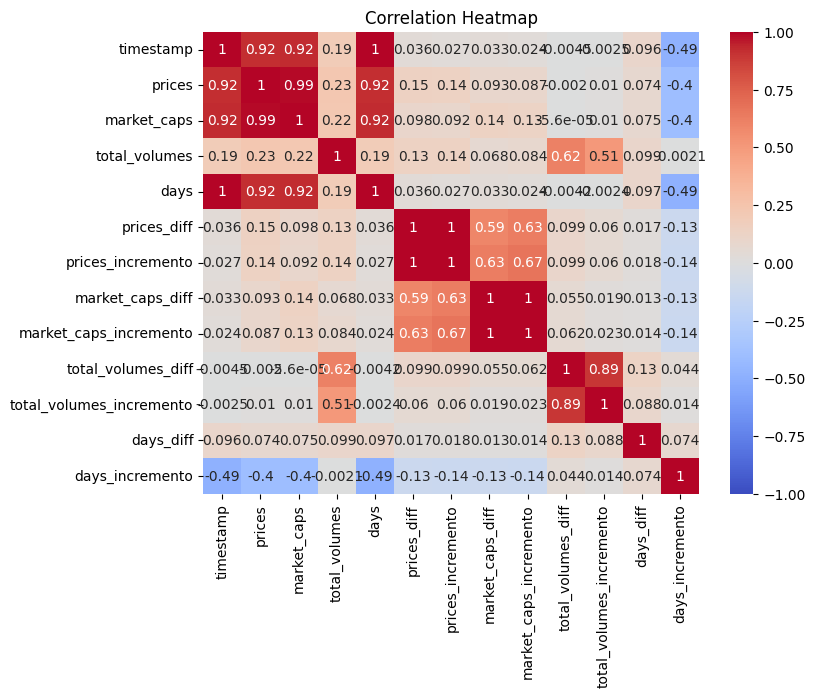

                          timestamp    prices  market_caps  total_volumes  \
timestamp                  1.000000  0.918900     0.923556       0.192147   
prices                     0.918900  1.000000     0.989835       0.228167   
market_caps                0.923556  0.989835     1.000000       0.220432   
total_volumes              0.192147  0.228167     0.220432       1.000000   
days                       0.999983  0.918993     0.923590       0.192669   
prices_diff                0.035640  0.147118     0.098147       0.134214   
prices_incremento          0.026634  0.136406     0.091653       0.140503   
market_caps_diff           0.033336  0.092698     0.138975       0.067712   
market_caps_incremento     0.024168  0.086860     0.127962       0.084133   
total_volumes_diff        -0.004490 -0.002033    -0.000056       0.615740   
total_volumes_incremento  -0.002463  0.010457     0.010215       0.506556   
days_diff                  0.096067  0.073980     0.075306       0.098698   

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = projected_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

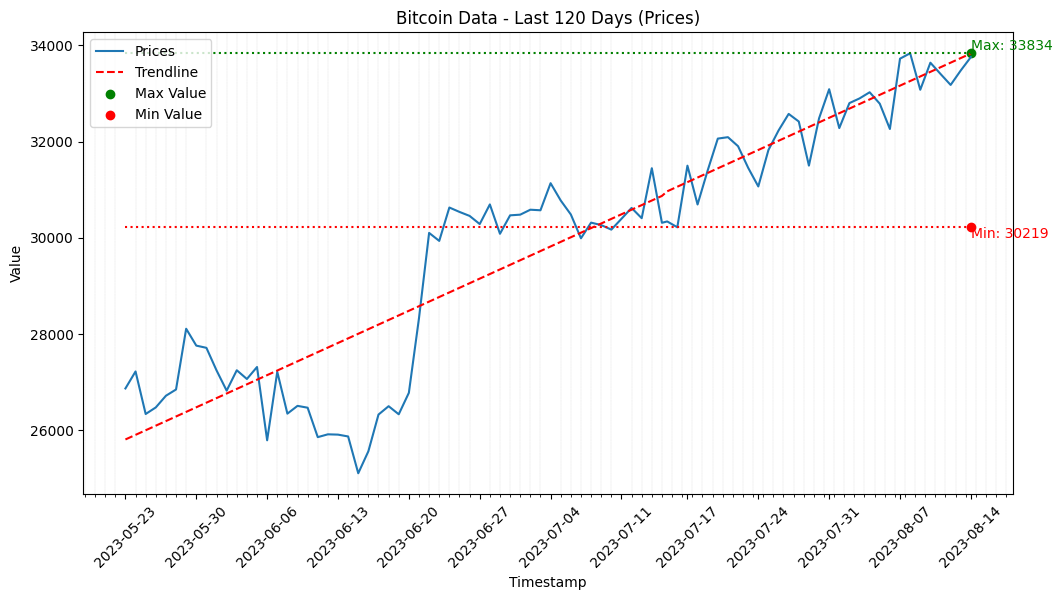

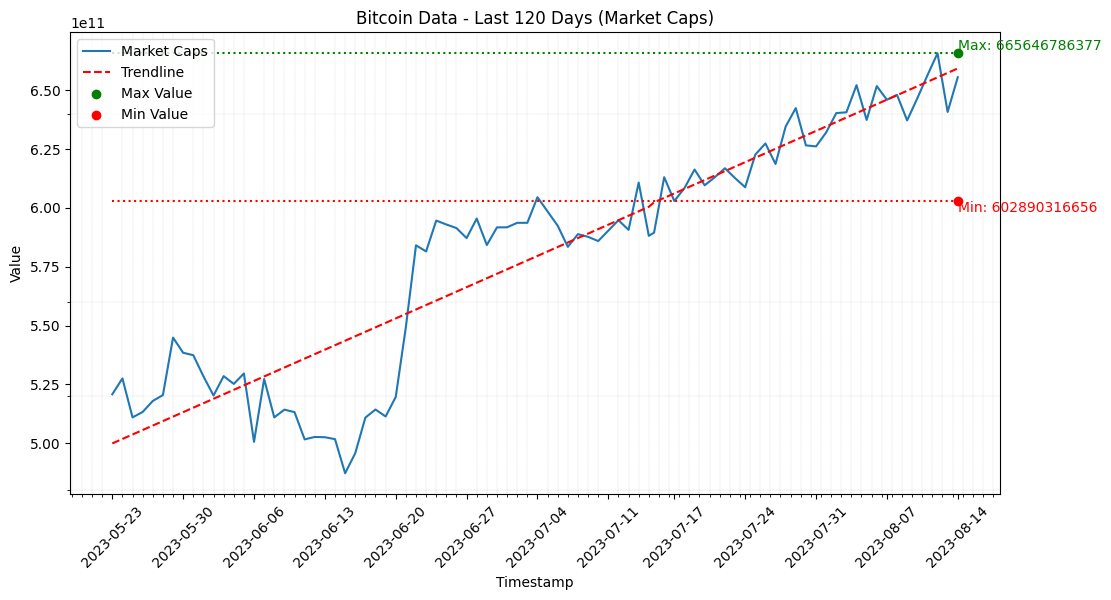

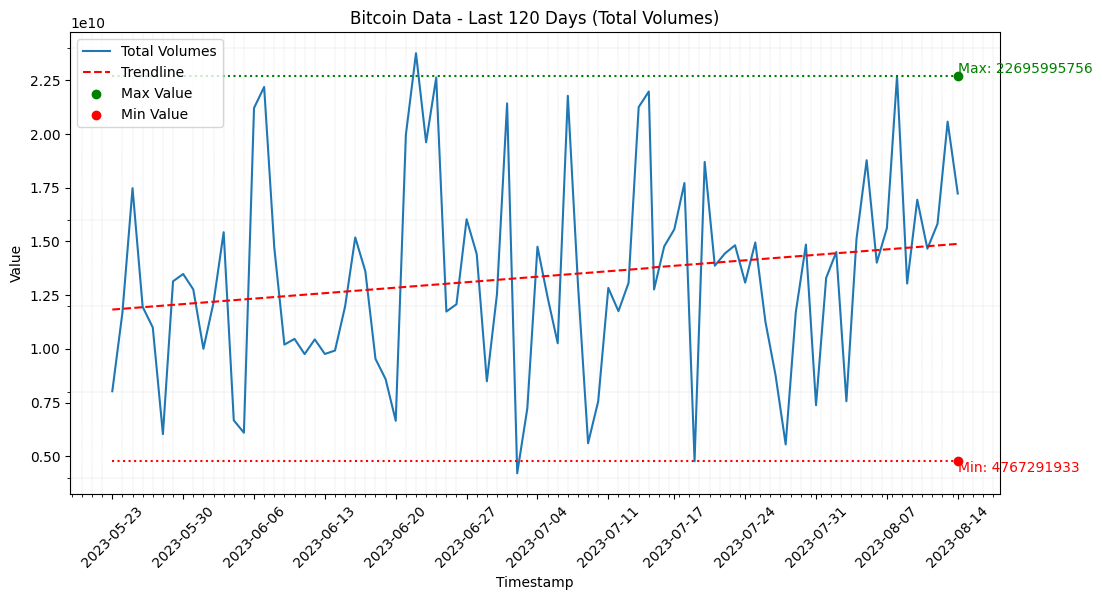

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


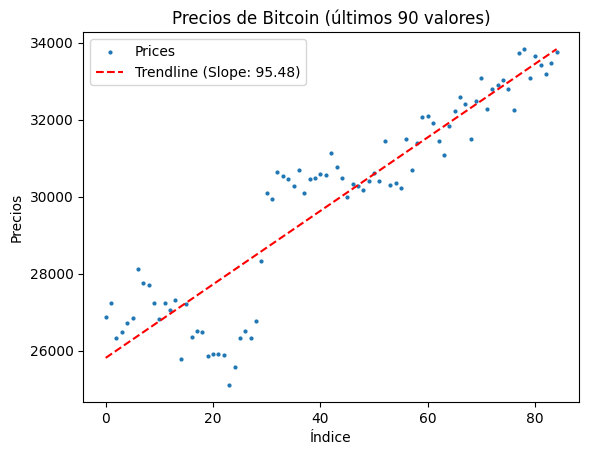

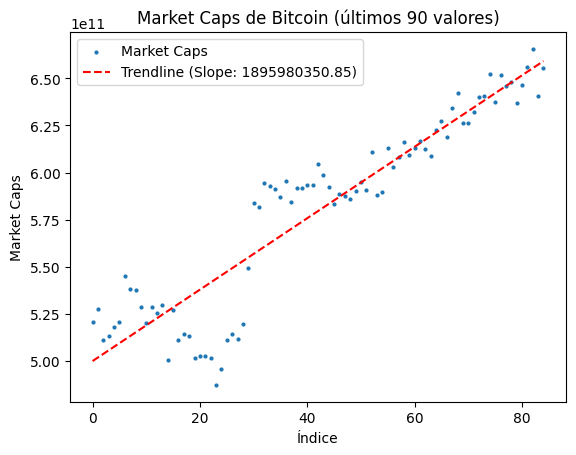

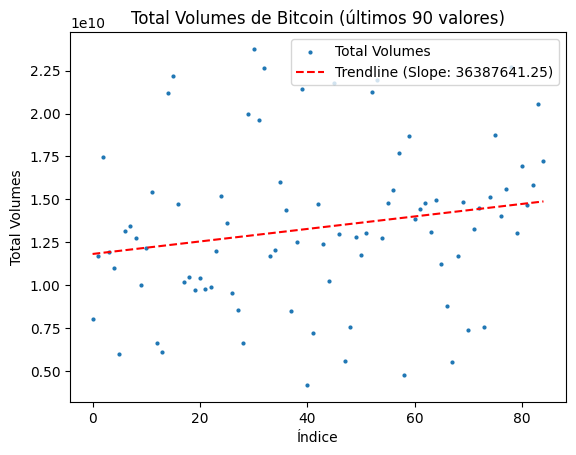

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 90 valores de los DataFrames
last_90_prices = projected_df['prices'].tail(90)
last_90_market_caps = projected_df['market_caps'].tail(90)
last_90_total_volumes = projected_df['total_volumes'].tail(90)

# Crear un rango de índices para los últimos 90 valores
indices = range(len(last_90_prices))

# Graficar los valores de precios
plt.scatter(indices, last_90_prices, s=4, label='Prices')

# Calcular la pendiente de los precios
slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
slope_prices_str = '{:.2f}'.format(slope_prices)

# Graficar la línea de tendencia de los precios
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

plt.title("Precios de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Precios")
plt.legend()
plt.show()

# Graficar los valores de market_caps
plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# Calcular la pendiente de los market_caps
slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# Graficar la línea de tendencia de los market_caps
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

plt.title("Market Caps de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Market Caps")
plt.legend()
plt.show()

# Graficar los valores de total_volumes
plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# Calcular la pendiente de los total_volumes
slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# Graficar la línea de tendencia de los total_volumes
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Total Volumes")
plt.legend()
plt.show()

_____________________________________________